In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/code/uchicago/sociohydro/sim/meanField/SchellingMF`


In [2]:
using SchellingMF
using Distributions
using Plots
using LaTeXStrings
using JSON
using LinearAlgebra
using BenchmarkTools
using HDF5
using Printf
using Zygote

[ Info: Precompiling SchellingMF [32cf9677-621a-48fb-9dac-cb166cb73326]


In [38]:
dx = 0.625
Nx = 96
dt = 1e-2
Nt = Int(2e6)
snapshot = 10000
savepath = "/Users/danny/Google Drive/My Drive/uchicago/sociohydro/2024-03-08_zygoteTest"
filename = "data"
ϕA0 = 1/4
ϕB0 = 1/4
δϕA0 = 0.05
δϕB0 = 0.05
α = 0.0
κm = +0.9
κp = 0.0
nl = 0.5
Tc = (1 + α) * ϕA0
temp = 0.1
Γ = 1.0

1.0

In [39]:
fitnessA(ϕA, ϕB, κp, κm) = ϕA + (κp - κm) * ϕB / 2
fitnessB(ϕA, ϕB, κp, κm, nl) = ϕB * (1.0 - nl * ϕB) + (κp + κm) * ϕA / 2

fitnessB (generic function with 1 method)

In [40]:
πA(ϕA, ϕB) = fitnessA(ϕA, ϕB, κp, κm)
πB(ϕA, ϕB) = fitnessB(ϕA, ϕB, κp, κm, nl)

πB (generic function with 1 method)

In [41]:
ϕA = ϕA0 .+ rand(Uniform(-1, 1), Nx) .* δϕA0;
ϕB = ϕB0 .+ rand(Uniform(-1, 1), Nx) .* δϕB0;

U(ϕA, ϕB) = ϕA * πA(ϕA, ϕB) + ϕB * πB(ϕA, ϕB);

In [45]:
ϕA, ϕB, t = run_simulation(dx, Nx, dt, Nt, πA, πB,
                           snapshot, savepath, filename,
                           ϕA0=ϕA0, ϕB0=ϕB0, δϕA0=δϕA0, δϕB0=δϕB0,
                           α=α, temp=temp, Γ=Γ);

Starting main loop...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:48


([0.03693428693723312, 0.050551229556895116, 0.06529847053639123, 0.07991812183949973, 0.09327039313370208, 0.10451361082707762, 0.11316428232323307, 0.11907571230847544, 0.12236920939495256, 0.12334352996635571  …  0.0012128908567013103, 0.0014660647930274662, 0.001842325598527747, 0.002416828645547812, 0.0033177277059022233, 0.004763638185752076, 0.007117874978366889, 0.010930936298534134, 0.016880888371222005, 0.02552180147862659], [0.21290185243660853, 0.1740149210358979, 0.14587731752219452, 0.1274292627649386, 0.11667164048422562, 0.111391945159165, 0.10963453733366867, 0.10988080861055753, 0.11105353900590453, 0.11245122874738264  …  0.6772041444421532, 0.6561585720795703, 0.628292738355197, 0.5928396032682216, 0.5494079196705781, 0.498326396718878, 0.4409722696658137, 0.3799428521479938, 0.3188997267258882, 0.2619842915543786], 19999.999999732387)

In [46]:
ϕA, ϕB, x, t, params = load_data(savepath);

[ Info: Saved animation to /Users/danny/code/uchicago/sociohydro/sim/meanField/SchellingMF/tmp.gif


Plots.AnimatedGif("/Users/danny/code/uchicago/sociohydro/sim/meanField/SchellingMF/tmp.gif")
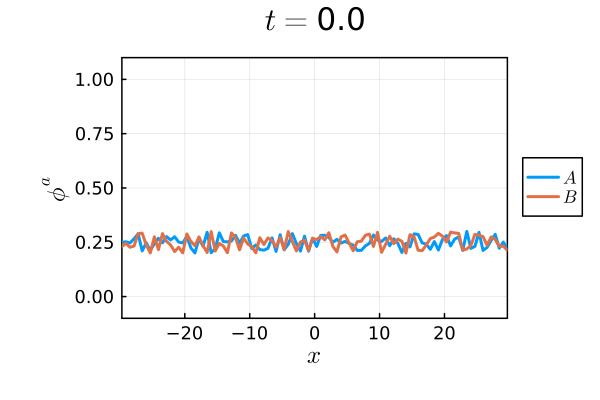

In [48]:
anim = @gif for ii in 1:length(t)
    plot(x, ϕA[:, ii], lw=2, label=L"A")
    plot!(x, ϕB[:, ii], lw=2, label=L"B")
    plot!(ylim=(-0.1, 1.1), xlims=(minimum(x), maximum(x)),
          framestyle=:box, thickness_scaling=1.5,
          xlabel=L"x", ylabel=L"\phi^a",
          title=L"t = " * string(round.(t[ii], digits=2)),
          leg=:outerright)
end

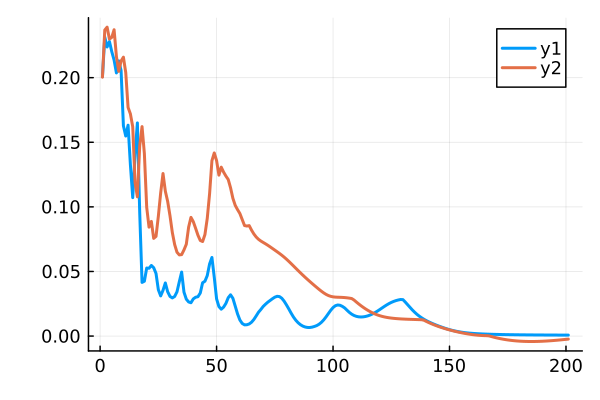

In [54]:
plot(thickness_scaling=1.5)
plot!([minimum(ϕA[:, i]) for i in 1:length(t)], lw=2)
plot!([minimum(ϕB[:, i]) for i in 1:length(t)], lw=2)